In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df = crime_data.drop(['Unnamed: 0'],axis=1)

In [5]:
df.head(10)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [7]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
df1 = pd.DataFrame(trans.fit_transform(df))

In [8]:
df1.head(10)

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [9]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

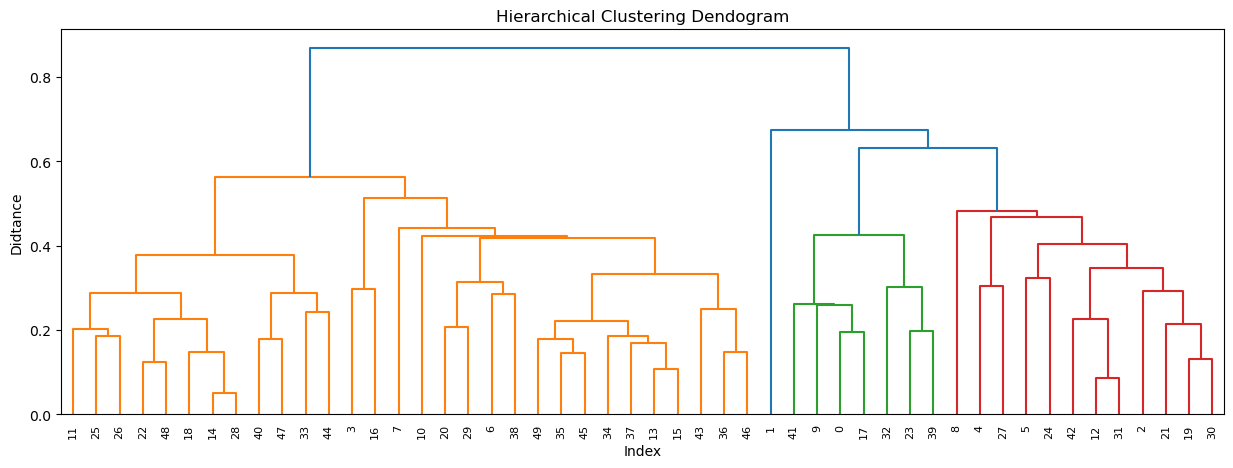

In [10]:
a = linkage(df1,method='average',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Index")
plt.ylabel("Didtance")
sch.dendrogram(a)
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")
h_complete = AgglomerativeClustering(n_clusters= 5,linkage = "average",affinity = "euclidean").fit(df1)

clust_label = pd.Series(h_complete.labels_)
crime_data['clust'] = clust_label
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [12]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0


In [13]:
data = crime_data[(crime_data.clust==0)]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [14]:
data1 = crime_data[(crime_data.clust==1)]
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [15]:
data2 = crime_data[(crime_data.clust==2)]
data2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [16]:
data3 = crime_data[(crime_data.clust==3)]
data3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [17]:
data4 = crime_data[(crime_data.clust==4)]
data4

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,4
14,Iowa,2.2,56,57,11.3,4
18,Maine,2.1,83,51,7.8,4
22,Minnesota,2.7,72,66,14.9,4
25,Montana,6.0,109,53,16.4,4
26,Nebraska,4.3,102,62,16.5,4
28,New Hampshire,2.1,57,56,9.5,4
33,North Dakota,0.8,45,44,7.3,4
40,South Dakota,3.8,86,45,12.8,4
44,Vermont,2.2,48,32,11.2,4


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
crime_data_subset = pd.DataFrame(sc.fit_transform(crime_data.iloc[:,1:5]))
crime_data_subset

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


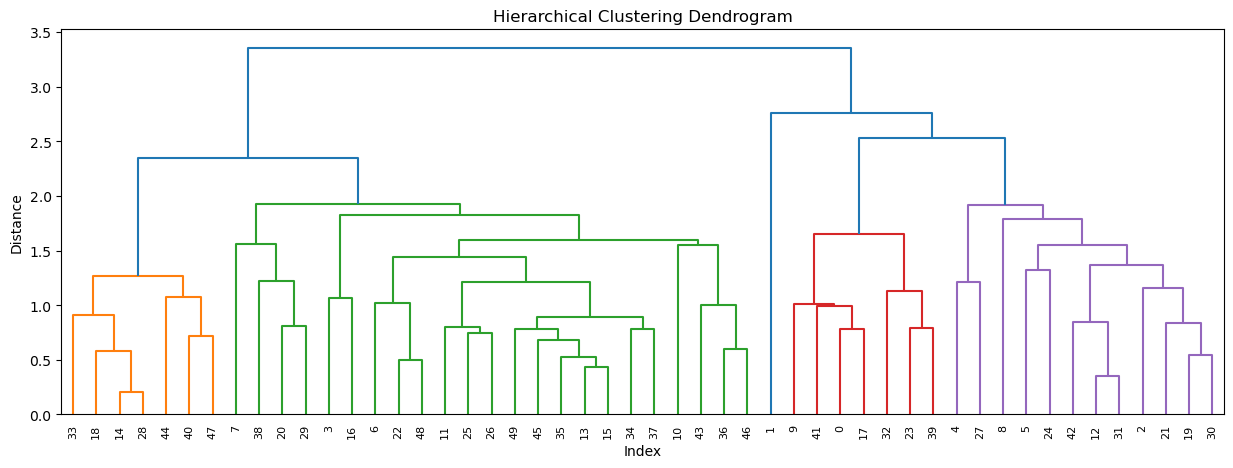

In [19]:
b = linkage(crime_data_subset,method='average',metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(b)
plt.show()

In [20]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(crime_data_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime_data['clust']=cluster_labels  
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [21]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.530435,129.434783,68.913043,17.786957,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,2.700000,65.142857,46.285714,9.885714,4.0


In [22]:
data = crime_data[(crime_data.clust==0)]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
22,Minnesota,2.7,72,66,14.9,0


In [23]:
data1 = crime_data[(crime_data.clust==1)]
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


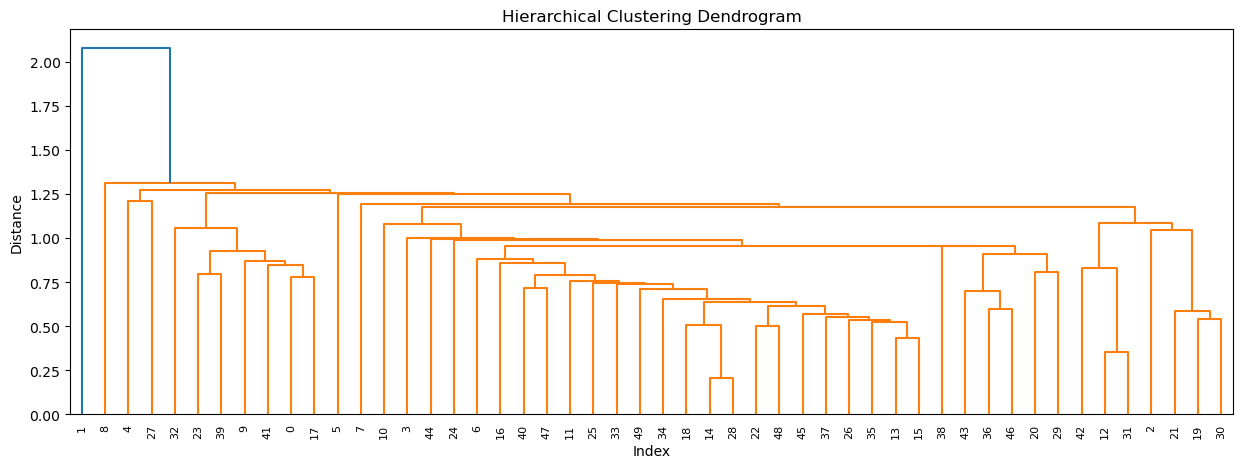

In [24]:
c = linkage(crime_data_subset, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(c)
plt.show()

In [25]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(crime_data_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime_data['clust']=cluster_labels 
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,4


In [26]:
data = crime_data[(crime_data.clust==0)]
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
12,Illinois,10.4,249,83,24.0,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0


In [27]:
import sklearn

In [28]:
sklearn.metrics.silhouette_score(df1, clust_label)

0.3257478134255528